<h1 align="center">Volume 4: Spectral 2.</h1>

    Bryant McArthur
    Section #
    January 19, 2023

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample Code

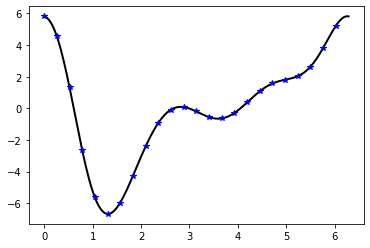

In [2]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

# Plot it
plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.show()

# Problem 1

Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

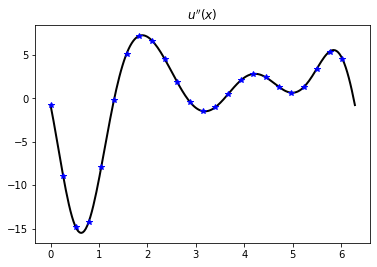

In [8]:
# Approximate the second derivative
fp_hat = fft(fp)
fpp_hat = ((1j*k*fp_hat))
fpp = np.real(ifft(fpp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
second_derivative = (2*np.cos(2*x2)*np.cos(x2) -
              np.sin(x2)*np.sin(2*x2) -
              3*np.sin(x2)**2*np.cos(x2) +
              2*(2*np.exp(2*np.sin(x2+1))*np.cos(x2+1)**2 -
              np.sin(x2+1)*np.exp(2*np.sin(x2+1))))

# Plot it
plt.plot(x2,second_derivative,'-k',linewidth=2.)
plt.plot(x1,fpp,'*b')
plt.title(r"$u''(x)$")
plt.show()

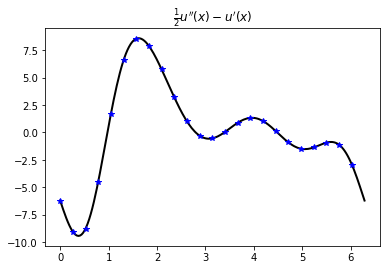

In [7]:
plt.plot(x2,second_derivative/2 - derivative,'-k',linewidth=2.)
plt.plot(x1,fpp/2 - fp,'*b')
plt.title(r"$\frac{1}{2}u''(x)-u'(x)$")
plt.show()

# Problem 2 - setup

In [2]:
def initialize_all(a,b,y0,h):
    n = int((b-a)/h+1)
    X = np.linspace(a,b,n)
    if isinstance(y0,np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X,Y,h,int(n)

def RK4(f,X,Y,h,n):
    for i in range(n-1):
        K1 = f(X[i],Y[i])
        K2 = f(X[i]+h/2,Y[i]+h/2*K1)
        K3 = f(X[i]+h/2,Y[i]+h/2*K2)
        K4 = f(X[i+1],Y[i]+h*K3)
        Y[i+1] = Y[i] + h/6*(K1+2*K2+2*K3+K4)
    return Y

# Problem 2 
Using a fourth order Runge-Kutta method (RK4), solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

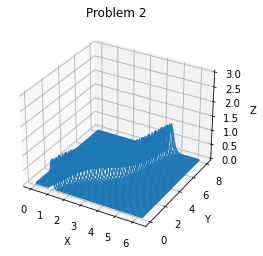

In [8]:
# Set Up
t_steps = 150
x_steps = 100
N = 100
k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

t_domain = np.linspace(0,8,t_steps)
x_domain = np.linspace(0,2*np.pi, x_steps)

# Functions
c = lambda x: .2 + np.sin(x-1)**2
C = c(x_domain)
u0 = lambda x: np.exp(-100*(x-1)**2)
y0 = u0(x_domain)
h = t_domain[1] - t_domain[0]

# Initialize
X,Y,h,n = initialize_all(0,8, y0, h)

# Our function
f = lambda x,U: np.real(-C*ifft((1j*k)*fft(U)))

# Get solution
sol = RK4(f,X,Y,h,n)

# Plot it
X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_wireframe(X,Y,sol)
ax.set_zlim(0,3)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Problem 2")
plt.show()